In [2]:
from krwordrank.word import KRWordRank

min_count = 5   # 단어의 최소 출현 빈도수 (그래프 생성 시)
max_length = 10 # 단어의 최대 길이
wordrank_extractor = KRWordRank(min_count, max_length)

In [3]:
file_path = "운수좋은날.txt"

with open(file_path, "r", encoding="UTF-8") as file:
    text = file.read()

# 이제 'text' 변수에는 파일 내용이 저장되어 있습니다.


In [4]:
from konlpy.tag import Okt
import re

def split_noun_sentences(text):
    okt = Okt()
    sentences = text.replace(". ",".")
    sentences = re.sub(r'([^\n\s\.\?!]+[^\n\.\?!]*[\.\?!])', r'\1\n', sentences).strip().split("\n")
    
    result = []
    for sentence in sentences:
        if len(sentence) == 0:
            continue
        sentence_pos = okt.pos(sentence, stem=True)
        nouns = [word for word, pos in sentence_pos if pos == 'Noun']
        if len(nouns) == 1:
            continue
        result.append(' '.join(nouns) + '.')
        
    return result

In [5]:
text

'          운수 좋은 날\n\n 현 진 건\n \n 새침하게 흐린 품이 눈이 올 듯하더니, 눈은 아니 오고 얼다가 만 비가 추적추적 내리었다.\n 이날이야말로 동소문 안에서 인력거꾼 노릇을 하는 김첨지에게는 오래간만에도 닥친 운수 좋은 날이었다. 문 안에(거기도 문밖은 아니지만) 들어간답시는 앞집 마나님을 전찻길까지 모셔다 드린 것을 비롯하여 행여나 손님이 있을까 하고 정류장에서 어정어정하며 내리는 사람 하나하나에게 거의 비는 듯한 눈길을 보내고 있다가, 마침내 교원인 듯한 양복장이를 동광학교(東光學校))까지 태워다 주기로 되었다.\n 첫 번에 삼십 전, 둘째 번에 오십 전 --- 아침 댓바람에 그리 흉하지 않은 일이었다. 그야말로 재수가 옴붙어서 근 열흘 동안 돈 구경도 못한 김첨지는 십 전짜리 백통화 서 푼, 또는 다섯 푼이 찰깍하고 손바닥에 떨어질 제 거의 눈물을 흘릴 만큼 기뻤었다. 더구나 이날 이때에 이 팔십 전이라는 돈이 그에게 얼마나 유용한지 몰랐다. 컬컬한 목에 모주 한 잔도 적실 수 있거니와, 그보다도 앓는 아내에게 설렁탕 한 그릇도 사다줄 수 있음이다.\n 그의 아내가 기침으로 쿨룩거리기는 벌써 달포가 넘었다. 조밥도 굶기를 먹다시피 하는 형편이니 물론 약 한 첩 써본 일이 없다. 구태여 쓰려면 못쓸 바도 아니로되, 그는 병이란 놈에게 약을 주어 보내면 재미를 붙여서 자꾸 온다는 자기의 신조(信條)에 어디까지 충실하였다. 따라서 의사에게 보인 적이 없으니 무슨 병인지는 알 수 없으나, 반듯이 누워 가지고 일어나기는커녕 새로 모로도 못 눕는 걸 보면 중증은 중증인 듯. 병이 이대도록 심해지기는 열흘 전에 조밥을 먹고 체한 때문이다. 그때도 김첨지가 오래간만에 돈을 얻어서 좁쌀 한 되와 십 전 짜리 나무 한 단을 사다 주었더니 김첨지의 말에 의하면, 오라질년이 천방지축(天方地軸)으로 남비에 대고 끓였다. 마음은 급하고 불길은 닿지 않아 채 익지도 않은 것을 그 오라질년이 숟가락은 고만두고 손으로 움켜서 두 뺨에 주먹덩이 같은 혹이 불거지

In [6]:
from krwordrank.word import KRWordRank

min_count = 1   # 단어의 최소 출현 빈도수 (그래프 생성 시)
max_length = 10 # 단어의 최대 길이
wordrank_extractor = KRWordRank(min_count=min_count, max_length=max_length)
beta = 0.85    # PageRank의 decaying factor beta
max_iter = 20
texts = split_noun_sentences(text)
keywords, rank, graph = wordrank_extractor.extract(texts, beta, max_iter)
for word, r in sorted(keywords.items(), key=lambda x:x[1], reverse=True):
        print('%8s:\t%.4f' % (word, r))

      김첨:	8.9845
      소리:	5.3326
      듯이:	3.9931
     정거장:	3.7544
      얼마:	3.6941
      얼굴:	3.5175
      인력:	3.5036
      사람:	3.1584
      듯.:	2.6930
      오늘:	2.6749
      마음:	2.6274
      하나:	2.6210
      거리:	2.5453
      이의:	2.5287
      수.:	2.5263
      말.:	2.3245
      학생:	2.3236
      남편:	2.2488
      설렁:	2.1176
      자기:	2.1025
      것.:	1.8835
      다리:	1.8712
      손님:	1.6723
      곱빼:	1.6583
      여보:	1.6053
      모양:	1.5732
      연해:	1.5154
      운수:	1.5051
      정말:	1.4966
    빌어먹을:	1.4792
      전차:	1.4408
      어디:	1.4291
      벌써:	1.3926
     남대문:	1.3749
      가지:	1.3618
      창자:	1.3368
      치삼:	1.3211
      눈물:	1.2880
      삼은:	1.2640
      거기:	1.2501
      정적:	1.2232
      마치:	1.2140
      더욱:	1.2131
      우리:	1.2024
      걸음:	1.2001
      학교:	1.1900
      신지:	1.1824
      재미:	1.1812
      랍시:	1.1744
      아씨:	1.1680
      훌쩍:	1.1625
      주정:	1.1500
      시작:	1.1473
      남비:	1.1413
      그릇:	1.1255
      복판:	1.1207
      마누:	1.1116
      아내:	1.0996
      중대:	1.09

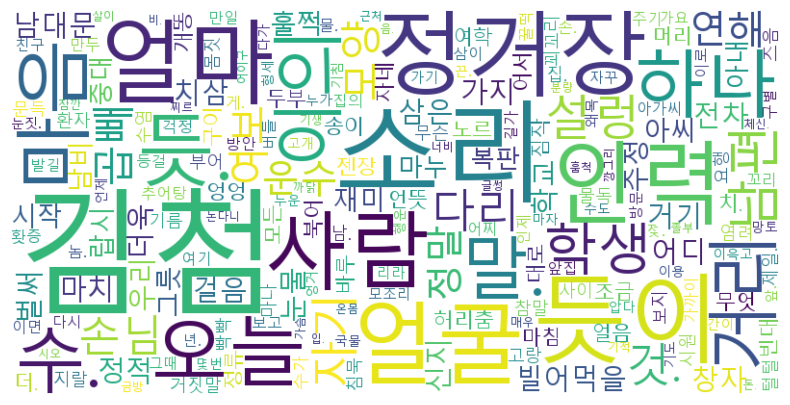

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# keywords에서 단어와 빈도수 추출
word_freq = {word: rank for word, rank in keywords.items()}

# WordCloud 객체 생성
wordcloud = WordCloud(width=800, height=400, background_color='white',font_path='C:/Windows/Fonts/malgun.ttf').generate_from_frequencies(word_freq)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
